<a href="https://colab.research.google.com/github/koel1-prog/covid19-analysis/blob/main/Covid19_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Improve plot Designs
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(12,7)
plt.rcParams['font.size']=1

# Loading the Dataset
df=pd.read_csv('/content/covid_19_clean_complete.csv.zip')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# Fill missing 'Province/State' with empty string for consistency
df['Province/State'] = df['Province/State'].fillna('')

# Verify data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object


In [29]:
# Helper Functions for Analysis

# Plot top N countries by total confirmed COVID-19 cases
def plot_top_countries_confirmed_cases(data, top_n=10):
  top_countries = data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(top_n)
  plt.figure(figsize=(6,10))
  ax=sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='Reds_r')
  plt.title(f"Top {top_n} Countries by Total Confirmed COVID-19 Cases")
  plt.xlabel("Total Confirmed Cases")
  plt.ylabel("Country")
  for i, v in enumerate(top_countries.values):
        ax.text(v + max(top_countries.values)*0.01, i, f'{v:,}', color='black', va='center')
  plt.tight_layout()
  plt.show()

# Plot time series of confirmed cases for given list of countries
def plot_time_series_countries(data, countries_list):
  plt.figure(figsize=(14,8))
  for country in countries_list:
    country_data = data[data['Country/Region'] == country].groupby('Date')['Confirmed'].sum().reset_index()
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country, linewidth=2)
  plt.title("COVID-19 Confirmed Cases Over Time")
  plt.xlabel("Date")
  plt.ylabel("Confirmed Cases")
  plt.legend(title='Country')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

# Plot correlation heatmap between Confirmed, Deaths, and Recovered cases
def plot_correlation_heatmap(data):
  corr_data = data[['Confirmed','Deaths','Recovered']].corr()
  plt.figure(figsize=(8,6))
  sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title("Correlation Between Confirmed, Deaths, and Recovered Cases")
  plt.tight_layout()
  plt.show()

--- Top Countries by Confirmed Cases ---


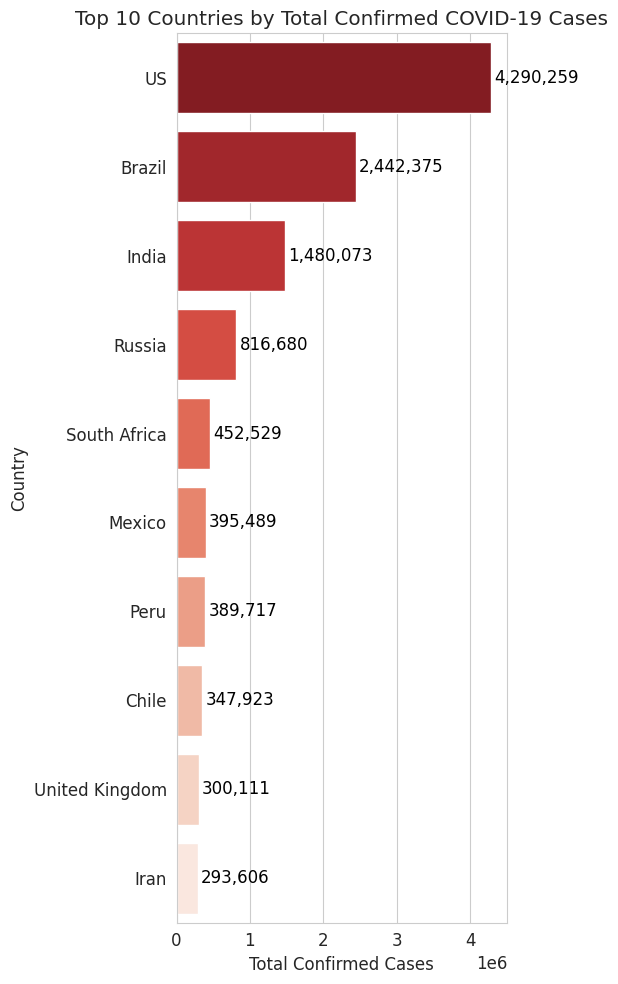


--- Time Series for Selected Countries ---


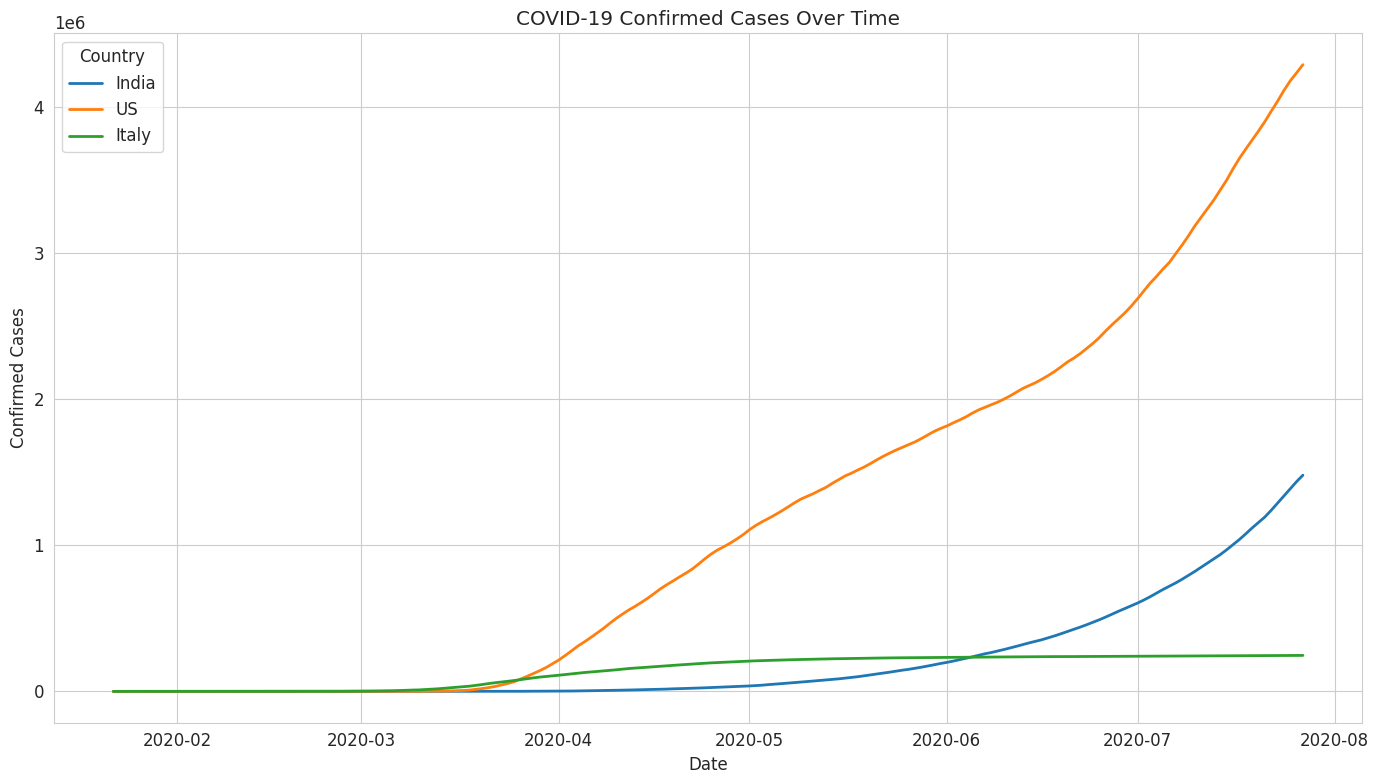


--- Correlation Heatmap ---


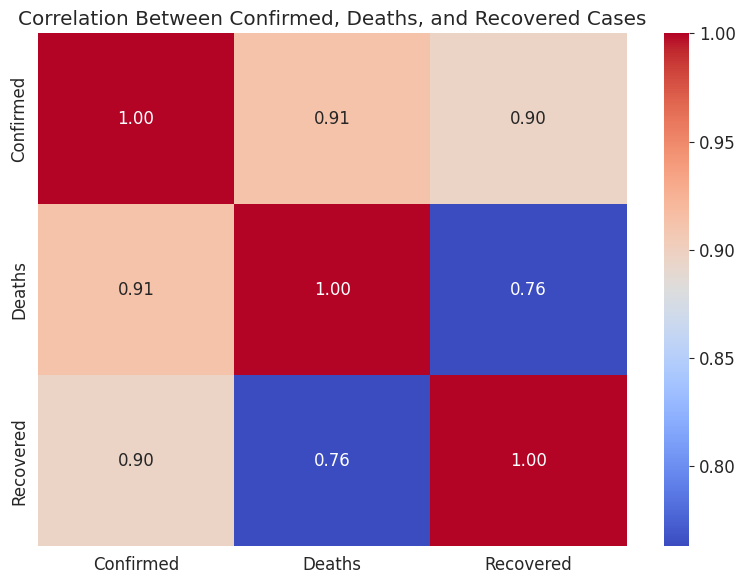

In [30]:
# Execute Analysis and Plotting
print("--- Top Countries by Confirmed Cases ---")
plot_top_countries_confirmed_cases(df,top_n=10)

print("\n--- Time Series for Selected Countries ---")
selected_countries=['India','US','Italy']
plot_time_series_countries(df, selected_countries)

print("\n--- Correlation Heatmap ---")
plot_correlation_heatmap(df)

In [31]:
# Summary Statistics
summary = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
print("\nOverall Latest Summary:")
print(summary.tail(1).to_string(index=False))


Overall Latest Summary:
      Date  Confirmed  Deaths  Recovered
2020-07-27   16480485  654036    9468087
